In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing files required for operations
data1 =  pd.read_csv('C:/Users/Asus/Desktop/project format/corrected_file_nobel_prize.csv')
oc = pd.read_csv("C:/Users/Asus/Desktop/project format/Organizations_Countries.csv")
data = data1

In [3]:
data.shape  # to konw the dimensions of the dataset

(969, 19)

In [4]:
data.head(3)   # knowing first few values 

,Full.Name,Year,Category,Prize,Motivation,Prize.Share,Laureate.ID,Laureate.Type,Birth.Date,Birth.City,Birth.Country,Sex,Organization.Name,Organization.City,Organization.Country,Death.Date,Death.City,Death.Country,Country
0,A. Michael Spence,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,745,Individual,1943-00-00,"Montclair, NJ",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN,NaN
1,Élie Ducommun,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,NaN
2,Aage Niels Bohr,1975,Physics,The Nobel Prize in Physics 1975,"""for the discovery of the connection between c...",1/3,102,Individual,1922-06-19,Copenhagen,Denmark,Male,Niels Bohr Institute,Copenhagen,Denmark,2009-09-08,Copenhagen,Denmark,NaN


In [5]:
#replace the special characters to plain text

dictionary = {'í':'i', 'á':'a', 'é':'e', 'è':'e' , 'É' : 'E'}
data.replace(dictionary, regex=True, inplace=True)

In [6]:
data.head(2)    # checking if operation was successful

,Full.Name,Year,Category,Prize,Motivation,Prize.Share,Laureate.ID,Laureate.Type,Birth.Date,Birth.City,Birth.Country,Sex,Organization.Name,Organization.City,Organization.Country,Death.Date,Death.City,Death.Country,Country
0,A. Michael Spence,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,745,Individual,1943-00-00,"Montclair, NJ",United States of America,Male,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN,NaN
1,Elie Ducommun,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,NaN


## Missing Values Correction

In [7]:
data.isnull().sum()

Full.Name                 0
Year                      0
Category                  0
Prize                     0
Motivation               88
Prize.Share               0
Laureate.ID               0
Laureate.Type             0
Birth.Date               29
Birth.City               28
Birth.Country            26
Sex                      26
Organization.Name       247
Organization.City       253
Organization.Country    252
Death.Date              352
Death.City              370
Death.Country           364
Country                 949
dtype: int64

### Sex

In [8]:
sex_null = data[data['Sex'].isnull()]
sex_null[['Laureate.Type','Sex']]

,Laureate.Type,Sex
47,Organization,NaN
48,Organization,NaN
107,Organization,NaN
155,Organization,NaN
156,Organization,NaN
157,Organization,NaN
247,Organization,NaN
282,Organization,NaN
335,Organization,NaN
400,Organization,NaN


Sex fields are blank because the laureate type is Organization. Thus, the sex is ambiguous. 

We will thus, just replace this by 'Organization'.

In [9]:
#using fillna() to replace null values by Organization in Sex column
data["Sex"].fillna("Organization", inplace = True) 

#to check if there are still some null values in sex column
data['Sex'].isnull().sum()


0

In [10]:
data['Sex'].value_counts()   # to check all the categories under Sex column and their counts

Male            893
Female           50
Organization     26
Name: Sex, dtype: int64

### Category

In [11]:
data['Category'].value_counts()     # checking all the types of category for which there is a nobel prize

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

There are no missing values in the category column.

In [12]:
data.groupby(['Category', 'Sex', 'Laureate.Type'])['Prize'].count().sort_values(ascending = False)


Category    Sex           Laureate.Type
Physics     Male          Individual       220
Medicine    Male          Individual       215
Chemistry   Male          Individual       190
Literature  Male          Individual        99
Peace       Male          Individual        86
Economics   Male          Individual        81
Peace       Organization  Organization      26
            Female        Individual        14
Literature  Female        Individual        14
Medicine    Female        Individual        12
Chemistry   Female        Individual         4
Physics     Female        Individual         2
Peace       Male          Organization       2
            Female        Organization       2
Economics   Female        Individual         2
Name: Prize, dtype: int64

Looks like the only the Peace category has the Laureate Type 'Organization'.

### Country

There are 3 country fields:
1. Birth.Coountry
2. Death.Country
3. Organization.Country

#### Organization Country

In [13]:
data['Organization.Country'].isnull().sum()

252

There are 252 blanks in Organization Country.

There are a few records that have an organization name as a full name. Thus let us take all those records where the full name is an organization name. We can get that list from the blank birth country columns.

In [14]:
data["Birth.Country"].fillna("", inplace = True) # replacing all the null values by empty string

In [15]:
data.loc[(data['Birth.Country'] == ""),["Death.Country","Birth.Country","Full.Name","Organization.Country","Country"]]

# validating

,Death.Country,Birth.Country,Full.Name,Organization.Country,Country
47,NaN,,American Friends Service Committee (The Quakers),NaN,United States of America
48,NaN,,Amnesty International,NaN,United Kingdom
107,NaN,,Bureau international permanent de la Paix (Per...,NaN,Germany
155,NaN,,Comite international de la Croix Rouge (Intern...,NaN,NaN
156,NaN,,Comite international de la Croix Rouge (Intern...,NaN,NaN
157,NaN,,Comite international de la Croix Rouge (Intern...,NaN,NaN
247,NaN,,European Union (EU),NaN,European Union
282,NaN,,Friends Service Council (The Quakers),NaN,United Kingdom
335,NaN,,Grameen Bank,NaN,Bangladesh
400,NaN,,Institut de droit international (Institute of ...,NaN,Belgium


In [16]:
data['Country'] = data['Country'].astype(str)

data['Organization.Country'].fillna(data['Country'], inplace=True)
# replacing null organization country names by thier respective country names by Country column
    
data['Country'] = data['Country'].astype(object)


#the other countries are unavailable

In [17]:
# replacing all other values by "Unavailable"
data["Organization.Country"].replace(to_replace ='nan', value ="Unavailable", inplace = True) 
data['Organization.Country'] = data['Organization.Country'].astype(object)



In [18]:
data.loc[(data['Birth.Country'] == ""),["Death.Country","Birth.Country","Full.Name","Organization.Country","Country"]]
# validating 

,Death.Country,Birth.Country,Full.Name,Organization.Country,Country
47,NaN,,American Friends Service Committee (The Quakers),United States of America,United States of America
48,NaN,,Amnesty International,United Kingdom,United Kingdom
107,NaN,,Bureau international permanent de la Paix (Per...,Germany,Germany
155,NaN,,Comite international de la Croix Rouge (Intern...,Unavailable,nan
156,NaN,,Comite international de la Croix Rouge (Intern...,Unavailable,nan
157,NaN,,Comite international de la Croix Rouge (Intern...,Unavailable,nan
247,NaN,,European Union (EU),European Union,European Union
282,NaN,,Friends Service Council (The Quakers),United Kingdom,United Kingdom
335,NaN,,Grameen Bank,Bangladesh,Bangladesh
400,NaN,,Institut de droit international (Institute of ...,Belgium,Belgium


In [19]:
# to see if all changes are made to column
data['Organization.Country'].value_counts()


United States of America               366
Unavailable                            232
United Kingdom                          93
Germany                                 52
France                                  41
Federal Republic of Germany             26
Switzerland                             23
Japan                                   18
Sweden                                  17
Netherlands                             12
Union of Soviet Socialist Republics     11
Denmark                                  9
Canada                                   8
Belgium                                  7
Austria                                  7
Italy                                    6
Australia                                6
United Nations                           6
Norway                                   5
Israel                                   5
Russia                                   3
China                                    2
Portugal                                 2
Argentina  

#### Birth Country

In [20]:
data.loc[(data['Birth.Country'] == ""),["Death.Country","Birth.Country","Organization.Country","Country"]]
# checking 

,Death.Country,Birth.Country,Organization.Country,Country
47,NaN,,United States of America,United States of America
48,NaN,,United Kingdom,United Kingdom
107,NaN,,Germany,Germany
155,NaN,,Unavailable,nan
156,NaN,,Unavailable,nan
157,NaN,,Unavailable,nan
247,NaN,,European Union,European Union
282,NaN,,United Kingdom,United Kingdom
335,NaN,,Bangladesh,Bangladesh
400,NaN,,Belgium,Belgium


In [21]:
# using for loop to count the no of values that are just empty strings 
count =0
for i in data['Birth.Country']:
    if (i == "" ):
          count += 1
              
print("No of null values in birth column is : ",count)

No of null values in birth column is :  26


In [22]:
# hence  replace them with Unavailable or Organization
data["Birth.Country"].replace(to_replace ="", value ="Unavailable/Organization", inplace = True) 
data['Birth.Country'] = data['Birth.Country'].astype(object)


In [23]:
data.loc[(data['Birth.Country'] == "Unavailable/Organization"),["Death.Country","Birth.Country","Organization.Country","Country"]]
# validating 

,Death.Country,Birth.Country,Organization.Country,Country
47,NaN,Unavailable/Organization,United States of America,United States of America
48,NaN,Unavailable/Organization,United Kingdom,United Kingdom
107,NaN,Unavailable/Organization,Germany,Germany
155,NaN,Unavailable/Organization,Unavailable,nan
156,NaN,Unavailable/Organization,Unavailable,nan
157,NaN,Unavailable/Organization,Unavailable,nan
247,NaN,Unavailable/Organization,European Union,European Union
282,NaN,Unavailable/Organization,United Kingdom,United Kingdom
335,NaN,Unavailable/Organization,Bangladesh,Bangladesh
400,NaN,Unavailable/Organization,Belgium,Belgium


#### Death Country

In [24]:
# validating 
data['Death.Country'] = data['Death.Country'].astype(str)

data.loc[(data['Death.Country'] == "nan"),["Death.City","Death.Country","Death.Date","Laureate.Type"]]


,Death.City,Death.Country,Death.Date,Laureate.Type
0,NaN,nan,NaN,Individual
3,NaN,nan,NaN,Individual
4,NaN,nan,NaN,Individual
7,NaN,nan,NaN,Individual
8,NaN,nan,NaN,Individual
...,...,...,...,...
960,NaN,nan,2004-11-11,Individual
964,NaN,nan,NaN,Individual
965,NaN,nan,NaN,Individual
966,NaN,nan,NaN,Individual


There are 364 blanks in Death Country

There are a few records where the person has not died yet. Some other records are blank cause the Laureate Type is an organization. Some other records are simply unavailable. Let us club them all as Unavailable/Undisclosed.

In [25]:
data["Death.Country"].replace(to_replace ="nan", value ="Unavailable/Undisclosed", inplace = True) 
data['Death.Country'] = data['Death.Country'].astype(object)


In [26]:
# to check if changes took place

data["Death.Country"].value_counts()

Unavailable/Undisclosed                         364
United States of America                        210
United Kingdom                                   74
France                                           52
Germany                                          35
Sweden                                           28
West Germany (Germany)                           27
Switzerland                                      26
Italy                                            14
Spain                                            10
Netherlands                                       9
Denmark                                           9
Belgium                                           9
Union of Soviet Socialist Republics (Russia)      8
Norway                                            8
Japan                                             7
Austria                                           6
Canada                                            6
Argentina                                         5
Russia      

# Cleaning Dataset

### Removing duplication of records

In [27]:
df_1 = pd.DataFrame(data1, columns=["Year","Category","Prize.Share","Full.Name"])
df_1[df_1.duplicated()]

,Year,Category,Prize.Share,Full.Name
6,1979,Physics,1/3,Abdus Salam
9,2011,Physics,1/4,Adam G. Riess
11,1939,Chemistry,1/2,Adolf Friedrich Johann Butenandt
25,2007,Physics,1/2,Albert Fert
45,2012,Economics,1/2,Alvin E. Roth
62,1949,Medicine,1/2,Antonio Caetano de Abreu Freire Egas Moniz
87,2005,Medicine,1/2,Barry J. Marshall
106,2011,Medicine,1/4,Bruce A. Beutler
113,1931,Chemistry,1/2,Carl Bosch
135,2009,Physics,1/2,Charles Kuen Kao


There are 58 unique records in this dataset that are actually duplicated. This means that the Year, Category, Full.Name and Country records are all same. However, the affiliated organization differs. 
It is also important to note that one of the organizations is either a subset or a part of the other organization (For instance: Kaiser-Wilhelm-Institut (now Max-Planck-Institut) für Biochemie is a part of the Berlin University (1939-Chemistry)).

Such records must be removed.

In [28]:
pd.DataFrame.drop_duplicates(data, subset= ["Year","Category","Prize.Share","Full.Name"], inplace = True)

data.shape

(911, 19)

# Data Visualization and EDA

### Time and Age

Let us first create an Age column. The age of a laureate at the time of his/her award will be the difference between the year in which the nobel prize was awarded and the birth year.

In [29]:
data[['Birth.Date' , 'Year']]

,Birth.Date,Year
0,1943-00-00,2001
1,1833-02-19,1902
2,1922-06-19,1975
3,1947-10-01,2004
4,1926-08-11,1982
...,...,...
964,1945-02-09,2016
965,1930-12-30,2015
966,1936-11-19,1986
967,1930-10-10,2005


In [30]:
#data['age'] = int(data['Birth.Date']) - int(data['Year'][:3])
data['Birth.Date'].astype(str)
data['Birth.Year'] = data['Birth.Date'].str[0:4] # sliced only required 4 digits for subtraction
data['age'] = ( data['Year'] - data['Birth.Year'].astype('float').astype('Int32') )
# first converted 'Birth.Year' column into float and then to int 
print("Maximum age is : ",data['age'].max(),"and minimum age is :",data['age'].min())

Maximum age is :  90 and minimum age is : 17


#### Age and Category

In [31]:
import warnings
warnings.filterwarnings('ignore')

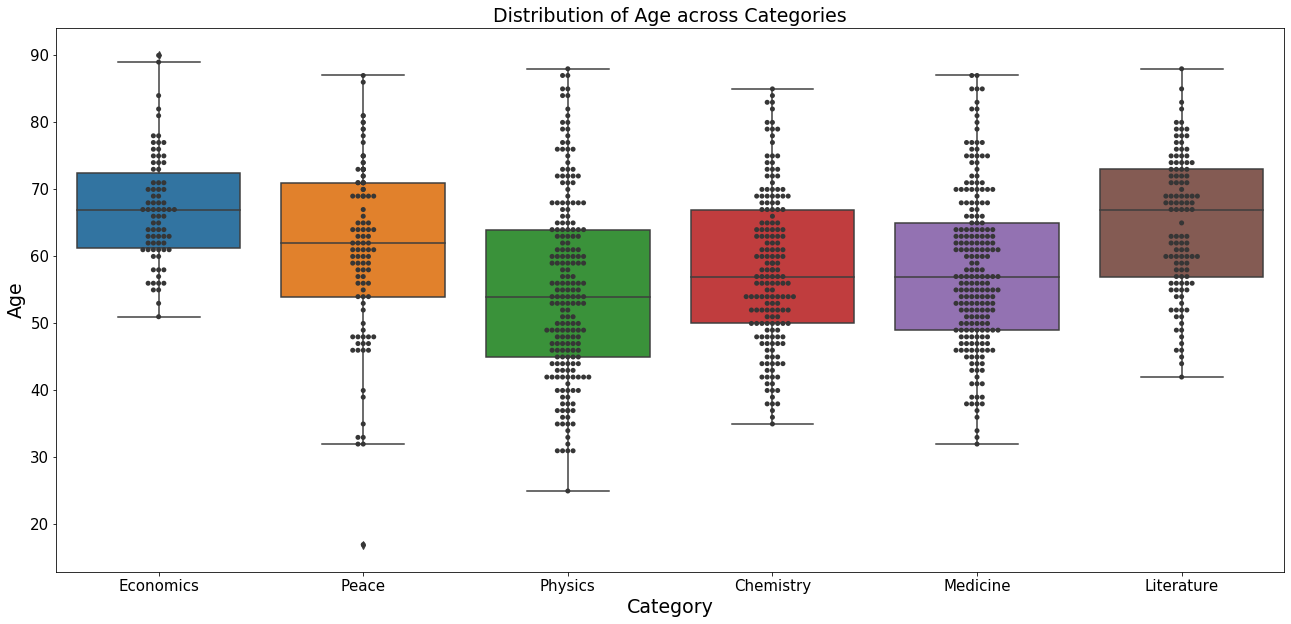

In [32]:
# library & dataset
import seaborn as sns
plt.figure(figsize=(22,10))

ax = sns.boxplot(x="Category", y="age", data=data)
ax = sns.swarmplot(x="Category", y="age", data=data, color=".21", linewidth = 0.002, dodge = True)
ax.axes.set_title("Distribution of Age across Categories",fontsize=19)
ax.set_xlabel("Category", fontsize=19)
ax.set_ylabel("Age", fontsize=19)
ax.tick_params(labelsize=15)

Text(0.5, 1.0, 'Age distribution on category of winners')

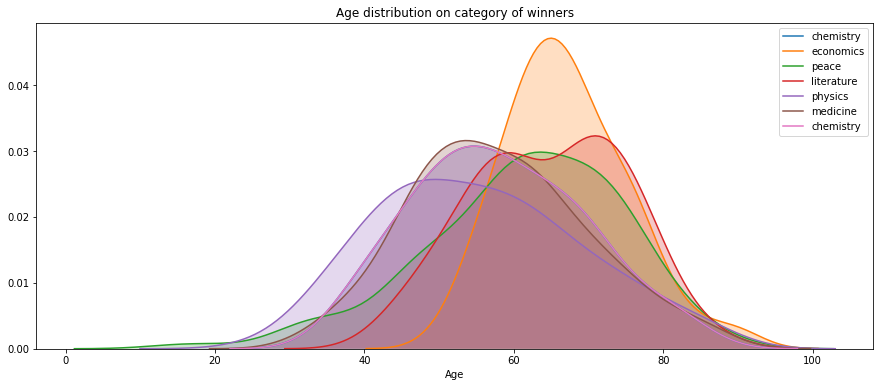

In [33]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data.age[data['Category'] == 'Chemistry'], label='chemistry', shade=True)
sns.kdeplot(data.age[data['Category'] == 'Economics'], label='economics', shade=True)
sns.kdeplot(data.age[data['Category'] == 'Peace'], label='peace', shade=True)
sns.kdeplot(data.age[data['Category'] == 'Literature'], label='literature', shade=True)
sns.kdeplot(data.age[data['Category'] == 'Physics'], label='physics', shade=True)
sns.kdeplot(data.age[data['Category'] == 'Medicine'], label='medicine', shade=True)
sns.kdeplot(data.age[data['Category'] == 'Chemistry'], label='chemistry', shade=True)
plt.xlabel('Age')
plt.title('Age distribution on category of winners')

It looks like Physics has a bulk of the youngest laureates. Chemistry and Medicine follow next. However, here is 1  point in Peace which is the youngest laureates across all categories. Economics has 4 people well above the 87.5 mark which might be the oldest laureates across categories. Literature, Physics, Peace and Medicine has have a couple of people each at the 87.5 borderline.

All categories have the average age around 60-65 years.

#### Time, Age and Category

Text(2007, 90, 'Leonid Hurwicz')

<Figure size 1584x720 with 0 Axes>

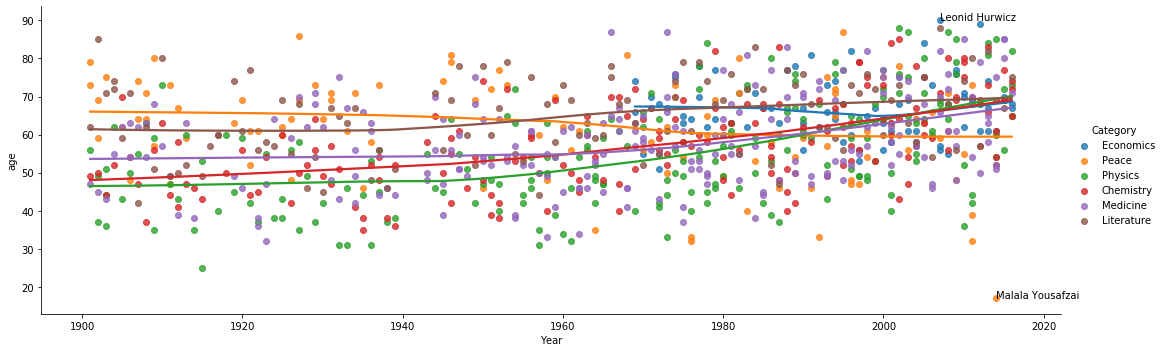

In [34]:
plt.figure(figsize=(22,10))
sns.lmplot('Year','age',data=data,lowess=True, aspect=3, hue='Category')
plt.text(2014,17,'Malala Yousafzai')
plt.text(2007,90,'Leonid Hurwicz')

Every category has an increasing trend except Peace. The age of laureates in the Peace category are decreasing with every passing year.

#### Time, Sex and Category

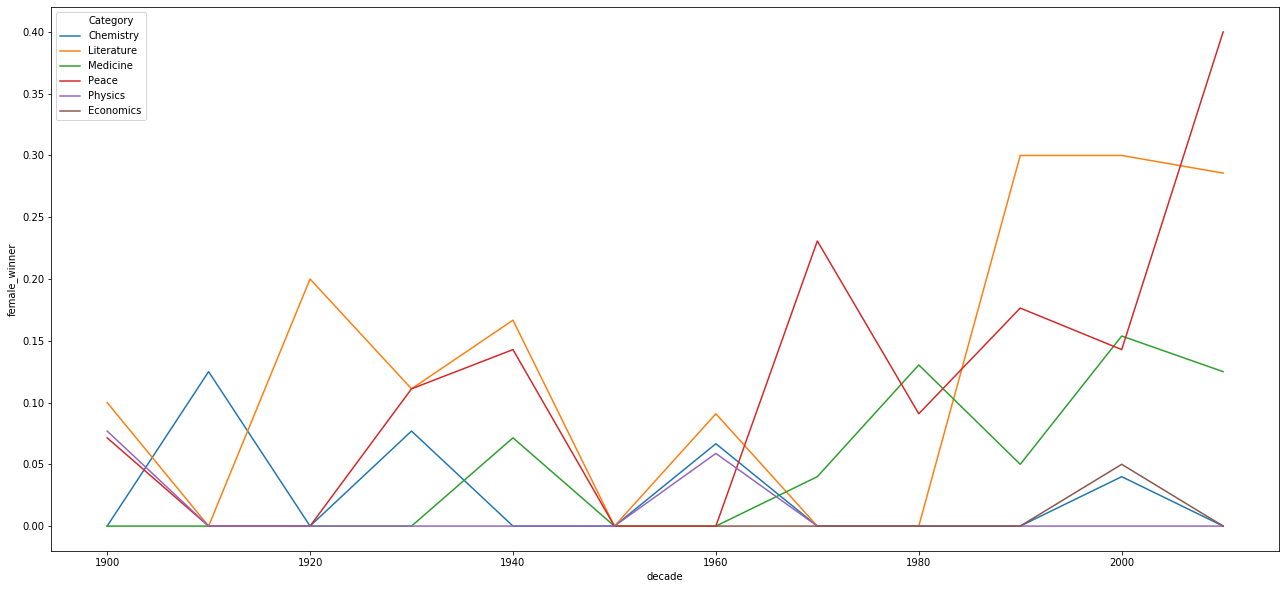

In [35]:
import numpy as np
data['female_winner'] = np.where(data['Sex']=="Female", True, False)
data['decade'] = (np.floor(data['Year']/10)*10).astype(int)
prop_female_winners = data.groupby(['decade','Category'],as_index=False)['female_winner'].mean()

plt.figure(figsize=(22,10))

ax = sns.lineplot(x='decade', y='female_winner', hue='Category', data=prop_female_winners)


The percentage of female winners seems to have increased in Literature, Medicine and Peace 1970 onwards. The other categories shown no evident trend otherwise.

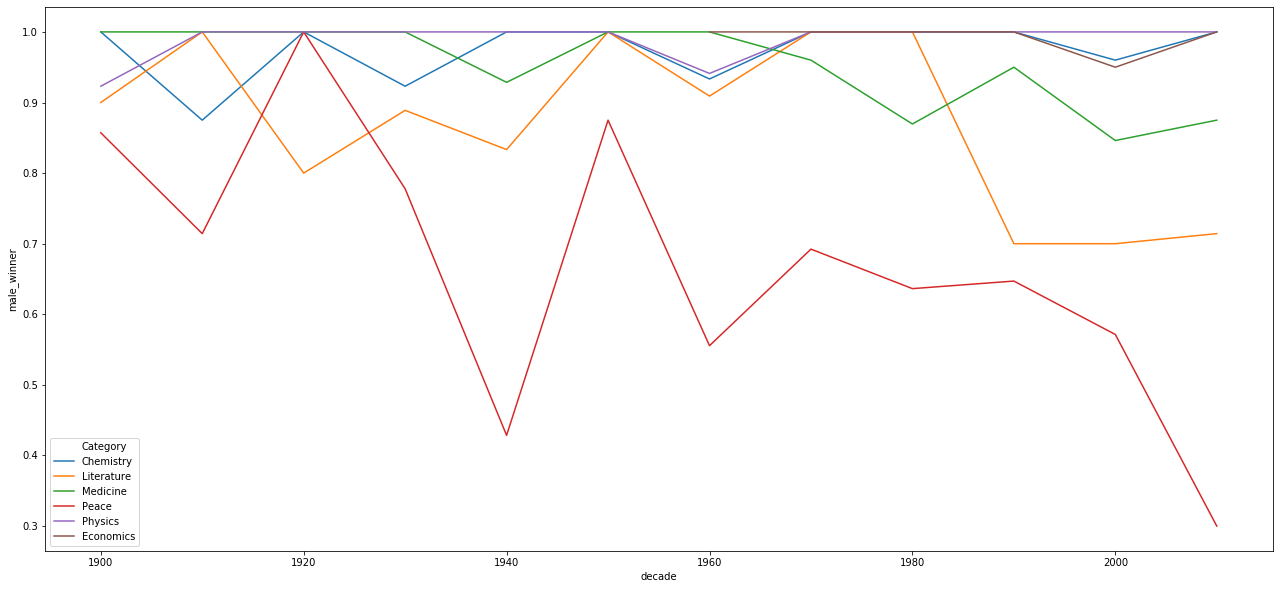

In [36]:
import numpy as np
data['male_winner'] = np.where(data['Sex']=="Male", True, False)
data['decade'] = (np.floor(data['Year']/10)*10).astype(int)
prop_male_winners = data.groupby(['decade','Category'],as_index=False)['male_winner'].mean()

plt.figure(figsize=(22,10))

ax = sns.lineplot(x='decade', y='male_winner', hue='Category', data=prop_male_winners)


Peace has a very evident downward trend in the percentage of male winners. Literature and Medicine also show a slight downward trend 1970 onwards.

#### Age and Year

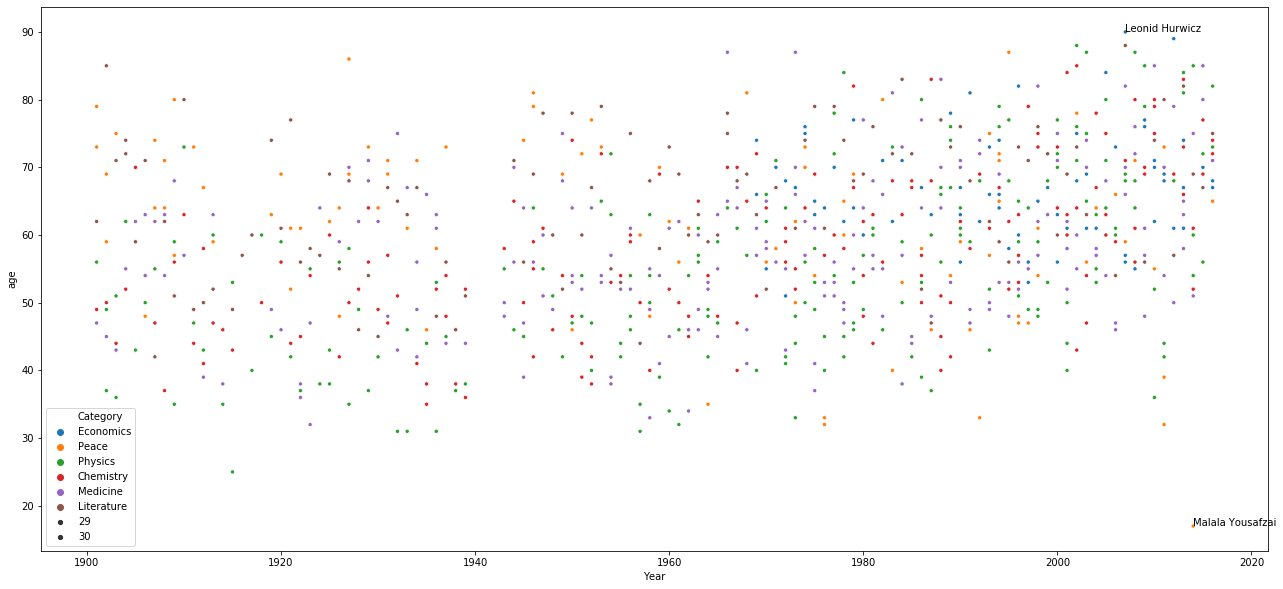

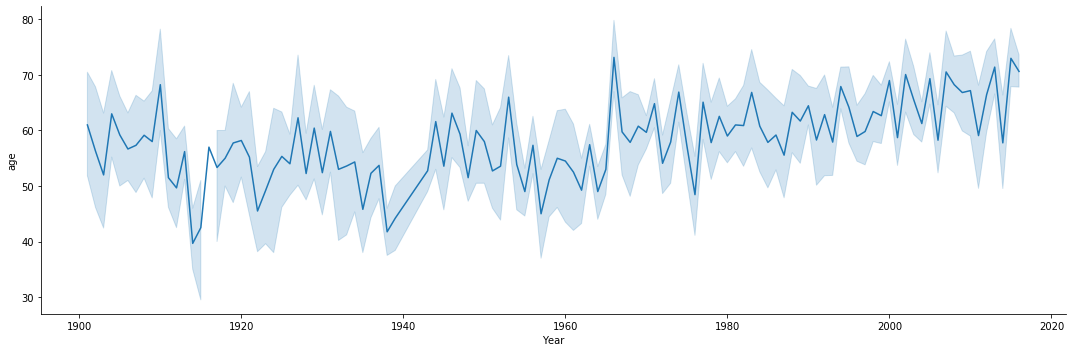

In [37]:
plt.figure(figsize=(22,10))

ax = sns.scatterplot(x='Year', y='age', hue='Category', data=data ,size=30)
plt.text(2014,17,'Malala Yousafzai')
plt.text(2007,90,'Leonid Hurwicz')

#  to plot general trend  of age of prize getters over the years 
ax = sns.relplot(x="Year", y="age", kind="line", data=data, aspect = 3)


The general trend of the age of the laureates with each passing year seems to be upwards. 

The youngest laureate is Malala Yousafzai who won the Nobel Peace Prize in 17 in 2014. The oldest is Leonid Hurwicz (aged 90 at the time of the award) who got the Economics Nobel Prize in 2007.

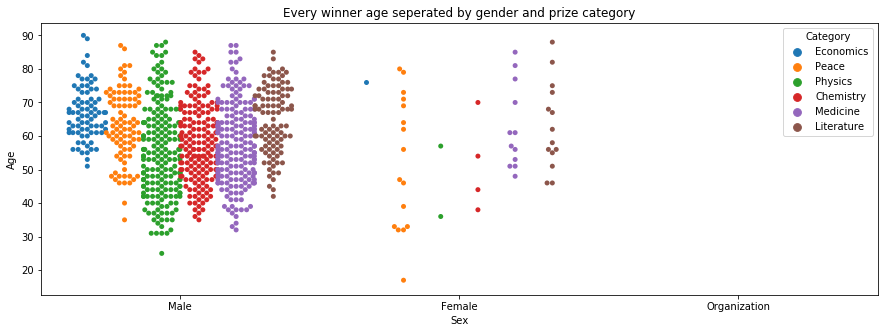

In [38]:
# ploting age distribution over Sex ategories i.e. male, female, organization
plt.figure(figsize=(15, 5))
sns.swarmplot(x='Sex', y='age',hue = 'Category', dodge=True , data=data)

plt.ylabel('Age')
plt.xlabel('Sex')
plt.title('Every winner age seperated by gender and prize category')
plt.show()

Some interesting observations:
1. The 5 youngest female laureates have won awards in the Category Peace. For males, all 5 have won it in Physics
2. While the youngest female was aged 17 and the youngest male was aged 25, all other (consecutive) young laureates were aged in the range 31-33
3. For the old laureates, the age range across the genders seems to be 80-90 years

### Distribution across Categories

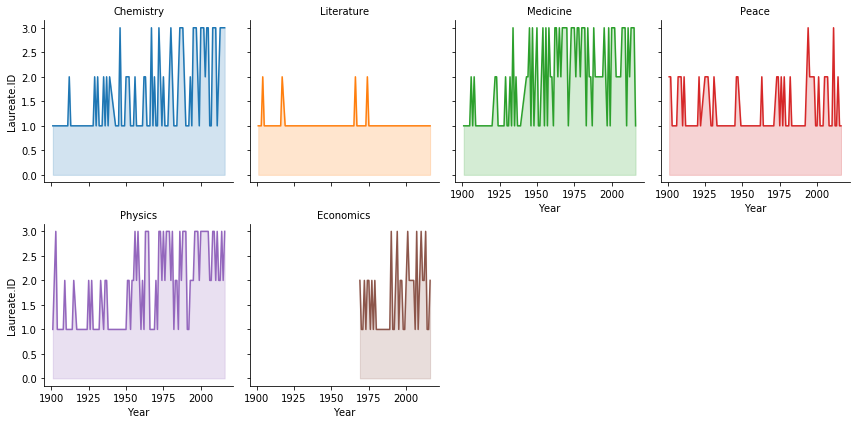

In [39]:
year_cat=data.groupby(['Year','Category'])['Laureate.ID'].count().reset_index() #grouping the data by year, category and laureate id 
year_cat
g101 = sns.FacetGrid(year_cat, col='Category', hue='Category', col_wrap=4, )
g101 = g101.map(plt.plot, 'Year', 'Laureate.ID')
g101 = g101.map(plt.fill_between, 'Year', 'Laureate.ID', alpha=0.2).set_titles("{col_name} Category")
g101 = g101.set_titles("{col_name}")
plt.show()

We see that in different categories at which year most no of prize were received according to Leaureate ID.
So in 1950 there is only one person to get nobel prize in physics category.

In [40]:
ctry101=data['Birth.Country'].value_counts().head(10) 
ctry101

year101=data['Year'].value_counts()
year101

cat101=data['Category'].value_counts()
cat101



Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: Category, dtype: int64

Text(0.5, 1.0, 'Nobel prize winners ratio according to categories')

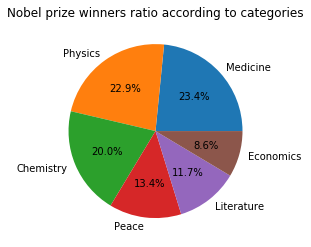

In [62]:
vals101= (227,222,194,130,113,83)
cat_label = 'Medicine', 'Physics', 'Chemistry', 'Peace', 'Literature', 'Economics'
plt.pie(vals101,labels=cat_label,radius=1,autopct='%0.1f%%')
plt.axis=('equal')
plt.title('Nobel prize winners ratio according to categories')

Clearly Medicine is the biggest category with most records here. A close second is Physics.

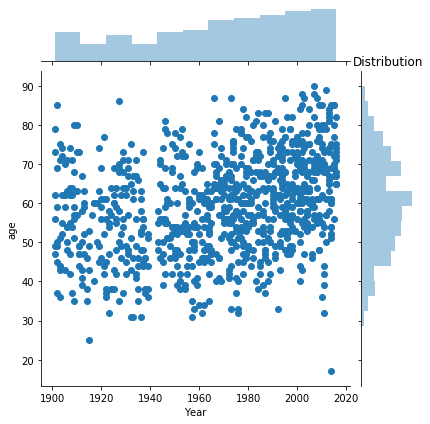

In [61]:
sns.jointplot(x="Year",y="age",data=data)
plt.title('Distribution')
plt.show()

Graph explains the distribution of age over the years, trend in no of awards given by year and distribution of age over the years.

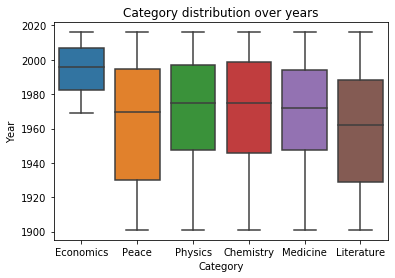

In [43]:
sns.boxplot(data=data,x='Category',y='Year') 
#plotting the boxplot using the data of category on X-axis and year on Y-axis
plt.title('Category distribution over years')
plt.show()

The Graph explains us the distribution of awards by category over the years.
So in economics category awards have density from 1960 to 2000.

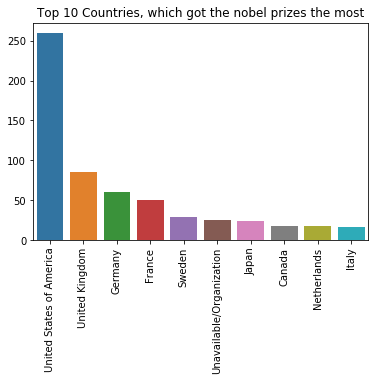

In [44]:
sns.barplot(x=ctry101.index,y=ctry101.values)#plotting the barplot using the country index and values
plt.xticks(rotation=90) #setting the rotation of the tupples used on x axis.
plt.title('Top 10 Countries, which got the nobel prizes the most')
plt.show()

USA is the dominant country in receiving the prizes, Next comes United Kingdom, Germany, France, Sweden.

### Distribution of laureates/ prizes across countries

Birth Countries 

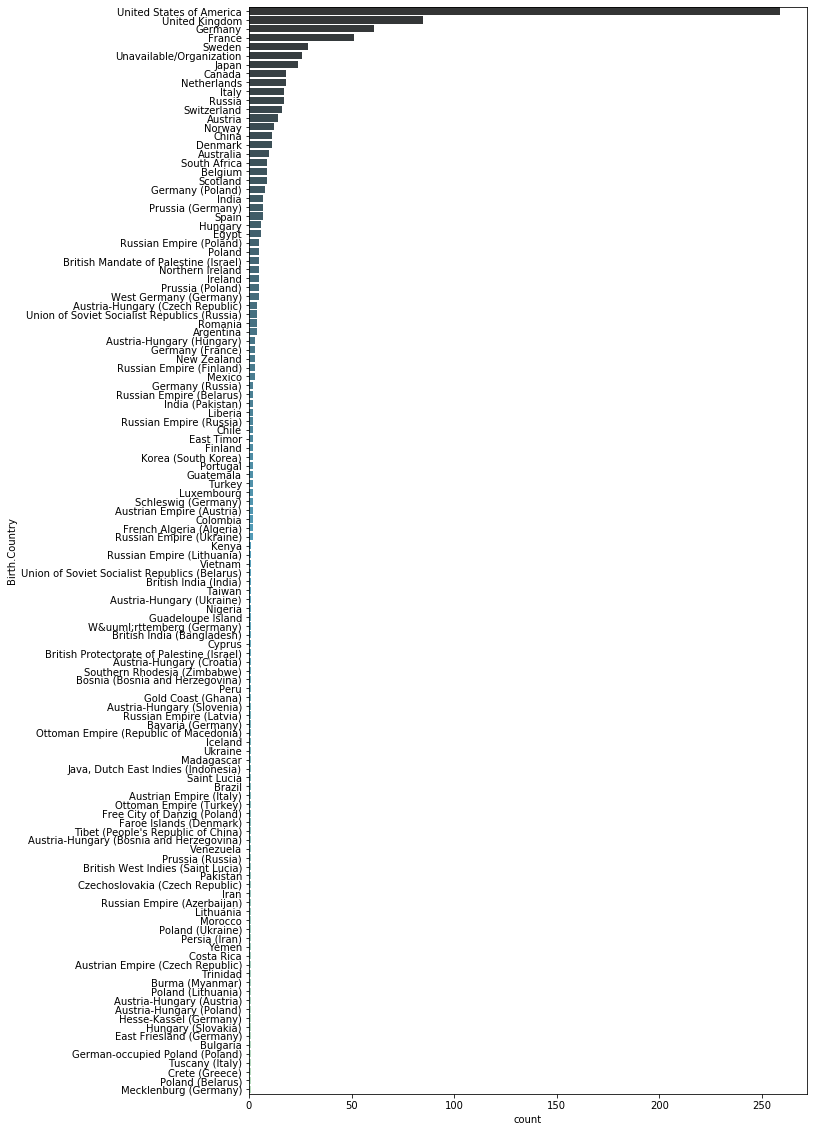

In [45]:
plt.figure(figsize=(10,20))
BirthCountryGraph = sns.countplot(y=data['Birth.Country'], data=data,
              order=data['Birth.Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

Organization Country

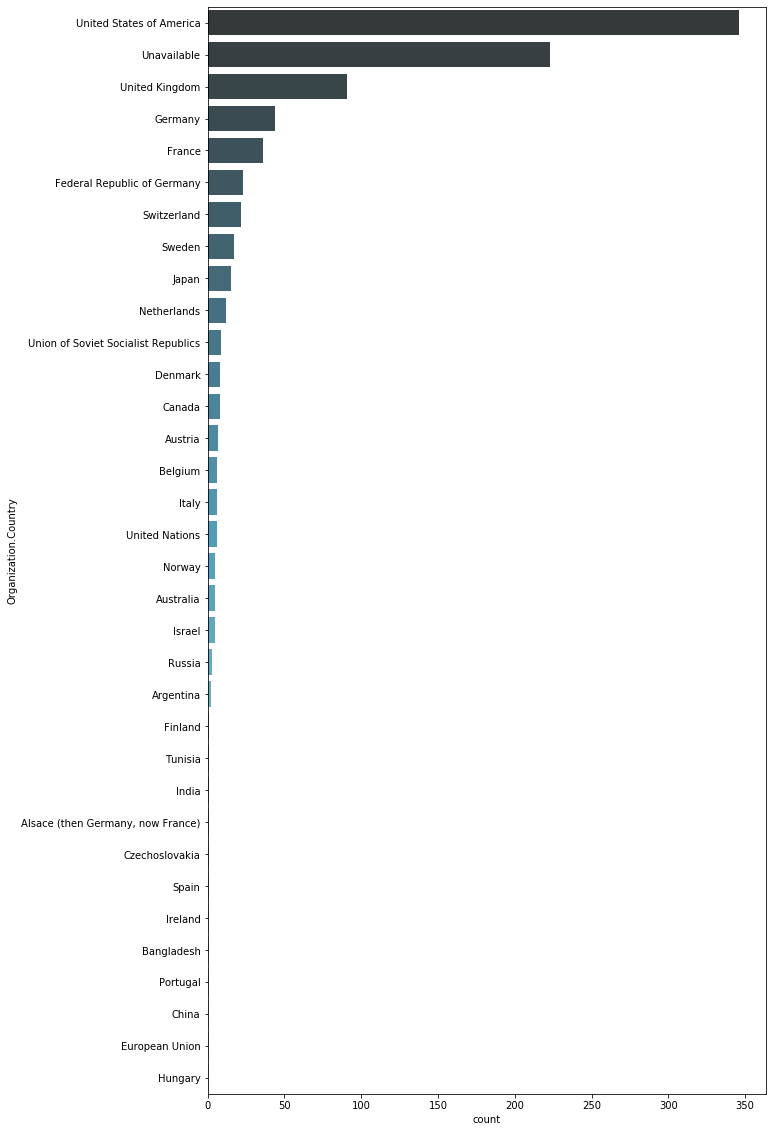

In [46]:
plt.figure(figsize=(10,20))
OrganisationCountryGraph = sns.countplot(y=data['Organization.Country'], data=data,
              order=data['Organization.Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

Death Country

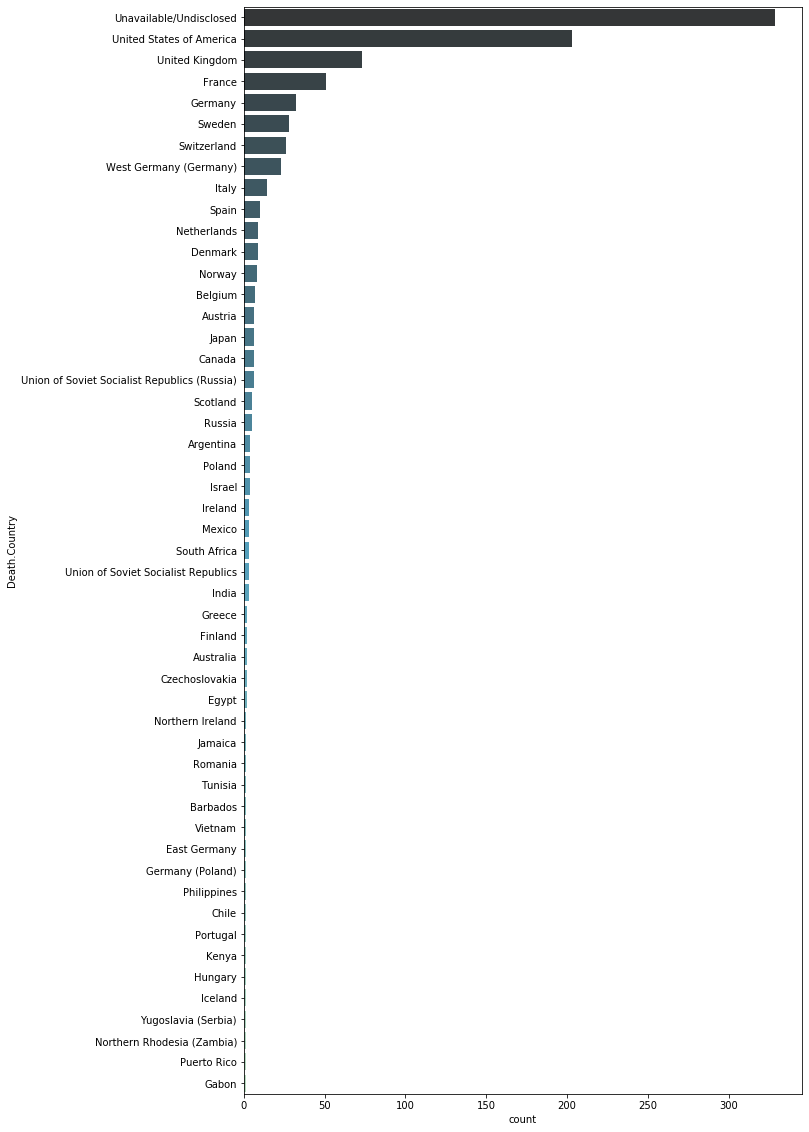

In [47]:
plt.figure(figsize=(10,20))
DeathCountryGraph = sns.countplot(y=data['Death.Country'], data=data,
              order=data['Death.Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

Organizations with the largest number of Nobel Lauretes

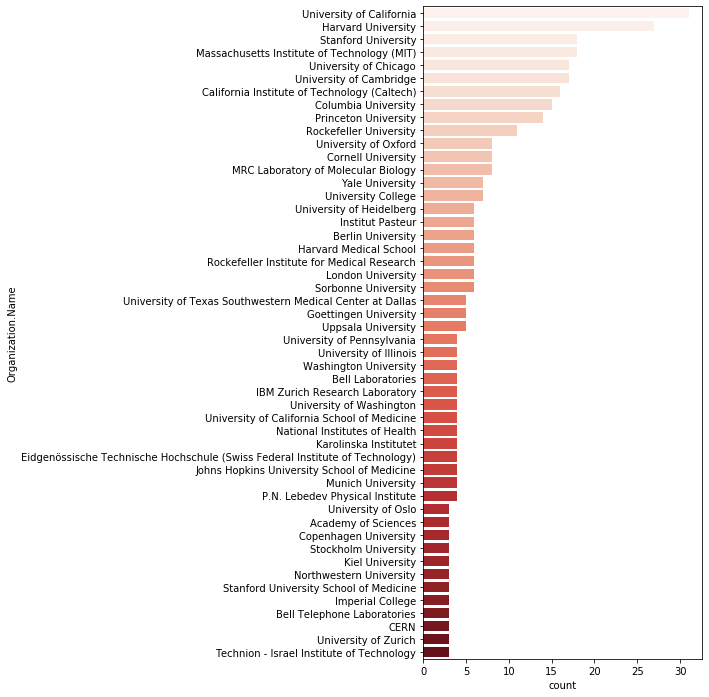

In [48]:
c = data['Organization.Name'].value_counts()
plt.figure(figsize=(5,12))
UniversitiesGraph = sns.countplot(y=data['Organization.Name'], data=data,
              order=c.nlargest(50).index,
              palette='Reds')
plt.show()

Trend of the top most country- USA

In [49]:
# Calculating the proportion of USA born winners per decade
data['usa_born_winner'] = data['Birth.Country']=="United States of America"
data['decade'] = (np.floor(data['Year']/10)*10).astype(int)
prop_usa_winners = data.groupby('decade',as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


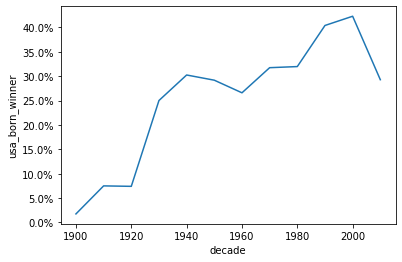

In [50]:
# Plotting USA born winners 
ax = sns.lineplot(data=prop_usa_winners, x='decade',y='usa_born_winner')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# The first evers... and only evers...

In this section we will look at the first ever awards.. or some interesting facts about the Nobel Prizes.

The first ever female Nobel Prize winner

In [63]:
first_female=data[data['Sex']=="Female"].nsmallest(1,'Year')

first_female[['Year','Full.Name','Category','Birth.Country','Prize.Share','age']]


,Year,Full.Name,Category,Birth.Country,Prize.Share,age
583,1903,"Marie Curie, nee Sklodowska",Physics,Russian Empire (Poland),1/4,36


It was Marie Curie who won 1/4th of the 1903 Nobel Prize for Physics. Let us now look at per category first female winners.

First Ever female winner in every category

In [52]:
female101 = data[data['Sex'] == 'Female']
female102 = female101.groupby('Category').apply(lambda x: x.nsmallest(1,'Year'))
female102[['Year','Full.Name','Category','Birth.Country']]

,,Year,Full.Name,Category,Birth.Country
Category,,,,,
Chemistry,584,1911,"Marie Curie, nee Sklodowska",Chemistry,Russian Empire (Poland)
Economics,218,2009,Elinor Ostrom,Economics,United States of America
Literature,805,1909,Selma Ottilia Lovisa Lagerlöf,Literature,Sweden
Medicine,329,1947,"Gerty Theresa Cori, nee Radnitz",Medicine,Austria-Hungary (Czech Republic)
Peace,85,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace,Austrian Empire (Czech Republic)
Physics,583,1903,"Marie Curie, nee Sklodowska",Physics,Russian Empire (Poland)


Interestingly, no female had won a Nobel Prize in economics until Elinor Ostrom did so in 2009.

First ever male winner in every category

In [53]:
male101 = data[data['Sex'] == 'Male']
male102 = male101.groupby('Category').apply(lambda x: x.nsmallest(1,'Year'))
male102[['Year','Full.Name','Category','Birth.Country']]

,,Year,Full.Name,Category,Birth.Country
Category,,,,,
Chemistry,428,1901,Jacobus Henricus van 't Hoff,Chemistry,Netherlands
Economics,441,1969,Jan Tinbergen,Economics,Netherlands
Literature,860,1901,Sully Prudhomme,Literature,France
Medicine,222,1901,Emil Adolf von Behring,Medicine,Prussia (Poland)
Peace,259,1901,Frederic Passy,Peace,France
Physics,928,1901,Wilhelm Conrad Röntgen,Physics,Prussia (Germany)


Only ever female to win multiple prizes

In [54]:
female1011 =data[data['Sex'] =="Female"]
female1021 =female1011[female1011.duplicated('Full.Name')]

female1021[['Year','Full.Name','Category','Birth.Country']]

,Year,Full.Name,Category,Birth.Country
584,1911,"Marie Curie, nee Sklodowska",Chemistry,Russian Empire (Poland)


The only female to ever win 2 Nobel Prizes across categories was Marie Curie- for Physics and Chemistry.

The (only) males to win multiple prizes

In [55]:
male1011 = data[data['Sex'] =="Male"]
male1021 = male1011[male1011.duplicated('Full.Name')]
male1021[['Year','Full.Name','Category','Birth.Country']]

,Year,Full.Name,Category,Birth.Country
274,1980,Frederick Sanger,Chemistry,United Kingdom
469,1972,John Bardeen,Physics,United States of America
563,1962,Linus Carl Pauling,Peace,United States of America


# Prize share

Text(0, 0.5, 'No. of prizes')

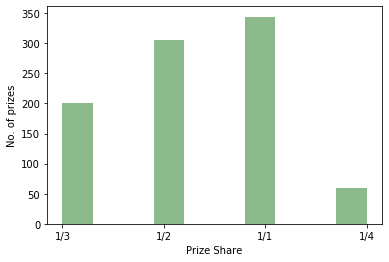

In [56]:

plt.hist(data['Prize.Share'],color=(0.5, 0.7, 0.5, 0.9))
plt.xlabel('Prize Share')
plt.ylabel('No. of prizes')


Prize Share by each Category


In [57]:
data.groupby(['Prize.Share'])['Category'].value_counts()

Prize.Share  Category  
1/1          Literature    105
             Peace          66
             Chemistry      63
             Physics        47
             Medicine       39
             Economics      24
1/2          Physics        79
             Medicine       72
             Peace          58
             Chemistry      53
             Economics      36
             Literature      8
1/3          Medicine       84
             Physics        48
             Chemistry      45
             Economics      18
             Peace           6
1/4          Physics        30
             Medicine       16
             Chemistry      14
Name: Category, dtype: int64

In [58]:
data.groupby(['Organization.Name'])['Prize'].count().sort_values(ascending = False).head(10)

Organization.Name
University of California                        31
Harvard University                              27
Stanford University                             18
Massachusetts Institute of Technology (MIT)     18
University of Chicago                           17
University of Cambridge                         17
California Institute of Technology (Caltech)    16
Columbia University                             15
Princeton University                            14
Rockefeller University                          11
Name: Prize, dtype: int64



University of California has won the maximum number of nobel prizes i.e. 31. The next is Harvard University. Let us look at the category wise split.


In [59]:
data.groupby(['Organization.Name','Category'])['Prize'].count().sort_values(ascending = False).head(10)

Organization.Name                            Category 
University of California                     Chemistry    13
University of Chicago                        Economics    12
University of California                     Physics      10
Stanford University                          Physics       9
Harvard University                           Physics       8
Rockefeller University                       Medicine      7
University of California                     Economics     7
Massachusetts Institute of Technology (MIT)  Physics       7
University of Cambridge                      Physics       7
Princeton University                         Physics       7
Name: Prize, dtype: int64


University of California is still at the top-- with 13 prizes in Chemistry. The next is University of Chicago with 12 prizes in Economics. Stanford University and Harvard University also feature in this top 10 list with 9 and 8 nobel prizes in Physics repectively.


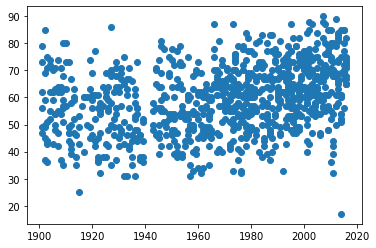

In [65]:
plt.scatter(data['Year'], data['age'])